### Random walk generator in 2D
In this code, the random walk is performed step by step. Adjust the num_steps variable to change the number of steps in the random walk. The final path is plotted and the displacement printed out.  Initial point is green, final point is red.



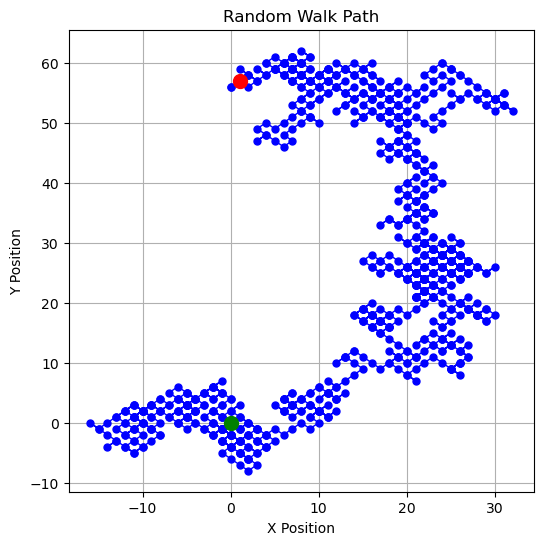

Final Position = ( 0 56 ) displacement= 56.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy

# Set the number of steps in the random walk
num_steps = 1000

# Initialize the position at the origin (0, 0)
x, y = 0, 0

# Lists to store the x and y coordinates of the random walk
x_positions = [x]
y_positions = [y]
# Perform the random walk step by step
for _ in range(num_steps):
    # Generate a random step (1 for right, -1 for left) in both x and y directions
    step_x, step_y = np.random.choice([-1, 1]), np.random.choice([-1, 1])
    
    # Update the position
    x += step_x
    y += step_y
    
    # Store the new position
    x_positions.append(x)
    y_positions.append(y)

# Show the final random walk path
plt.figure(figsize=(6, 6))
plt.plot(x_positions, y_positions, marker='o', color='b', linewidth=1, markersize=5)
plt.plot(x_positions[0], y_positions[0], marker='o', color='g', markersize=10)
plt.plot(x_positions[num_steps-1], y_positions[num_steps-1], marker='o', color='r', markersize=10)
plt.title('Random Walk Path')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()
displacement=np.sqrt(x*x+y*y)
print("Final Position = (",x,y,") displacement=",displacement)




###  series of  random walks in 1D
Now lets generate a series of random walks, for simplicity in 1D, and store their final position in xi.

Then we do a $\chi^2$ squared test to see if the random walk displacement fits the hypothesis that it is a Gaussian distribution with variance $num\_steps$.

Try running the code multiple times and see how often we can reject the hypothesis at 95\% confidence ($P<0.05$)

In [19]:
# Set the number of steps in the random walk
num_steps = 1000
num_walks =2000
xi=np.array([])
for i in range(0,num_walks):
# Generate random steps (1 for right, -1 for left)
  steps = np.random.choice([-1, 1], size=num_steps)
# Calculate the cumulative sum to get the random walk path
  random_walk = np.cumsum(steps)
  xi=np.append(xi,random_walk[num_steps-1])
#  Now calculate the chi2 statistic and do chi2 test
mean=0
var=(num_steps)
chi2=sum(xi*xi)/var
print("chi2=", chi2, ";  P<chi2 = ",scipy.stats.chi2.sf(chi2,num_walks))

chi2= 2126.764 ;  P<chi2 =  0.024193407711130436


### plot the histogram of the data,
each contribution to the chi2 sum (should be ~1)

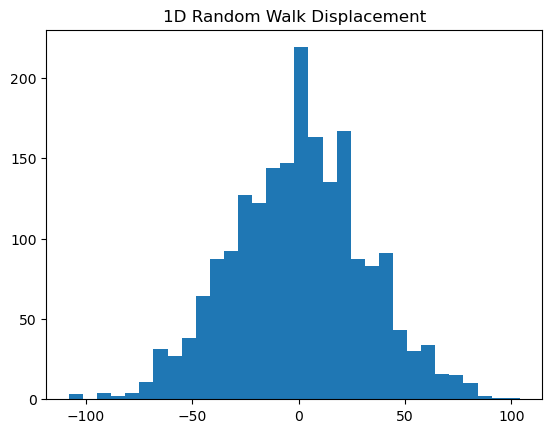

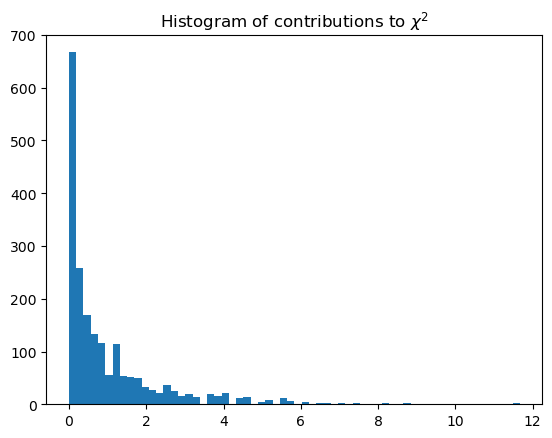

In [12]:
plt.hist(xi, bins='auto')
plt.title('1D Random Walk Displacement')
plt.show()
plt.title('Histogram of contributions to $\chi^2$')
plt.hist(xi*xi/var, bins='auto')
plt.show()